<a href="https://colab.research.google.com/github/Dushimepaulette1/Formativ-3-Group3/blob/main/machine_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Group Assignment

In [ ]:
import pandas as pd

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
import pandas as pd

data = pd.read_csv("IMDB Dataset.csv")

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
positive_keywords = ["loved it", "great"]
negative_keywords = ["boring", "terrible"]

In [ ]:

def count_keyword(df, keyword, sentiment):

    reviews = df[df['sentiment'] == sentiment]['review']

    count = reviews.str.contains(keyword, case=False, regex=False).sum()
    return count

In [ ]:
# Count how many positive reviews contain "great"
count_great = count_keyword(data, "great", "positive")
print(count_great)

# Count how many negative reviews contain "terrible"
count_terrible = count_keyword(data, "terrible", "negative")
print(count_terrible)

9281
2323


In [ ]:
# Total number of reviews
total_reviews = len(data)

# Number of positive reviews
num_positive = (data['sentiment'] == 'positive').sum()

# Prior probability
P_Positive = num_positive / total_reviews
print("Prior P(Positive) =", P_Positive)

Prior P(Positive) = 0.5


In [ ]:
# Total positive reviews
total_positive = num_positive

# Likelihood for "great"
keyword_count_positive = 9281  # the number you got
Likelihood_great = keyword_count_positive / total_positive
print('Likelihood P("great" | Positive) =', Likelihood_great)

Likelihood P("great" | Positive) = 0.37124


In [ ]:
# Suppose "great" appears in 1200 negative reviews
keyword_count_negative = 1200

# Marginal probability
Marginal_great = (keyword_count_positive + keyword_count_negative) / total_reviews
print('Marginal P("great") =', Marginal_great)

Marginal P("great") = 0.20962


In [ ]:
Posterior_great = (Likelihood_great * P_Positive) / Marginal_great
print('Posterior P(Positive | "great") =', Posterior_great)

Posterior P(Positive | "great") = 0.8855071081003721


In [ ]:
keywords = positive_keywords + negative_keywords

# Loop through each keyword
for kw in keywords:
    # Count in positive and negative
    pos_count = count_keyword(data, kw, "positive")
    neg_count = count_keyword(data, kw, "negative")

    # Likelihood: P(keyword | Positive)
    likelihood = pos_count / total_positive

    # Marginal: P(keyword)
    marginal = (pos_count + neg_count) / total_reviews

    # Posterior: P(Positive | keyword)
    posterior = (likelihood * P_Positive) / marginal

    # Print results
    print(f"Keyword: '{kw}'")
    print(f"  Prior P(Positive) = {P_Positive:.3f}")
    print(f"  Likelihood P({kw}|Positive) = {likelihood:.3f}")
    print(f"  Marginal P({kw}) = {marginal:.3f}")
    print(f"  Posterior P(Positive|{kw}) = {posterior:.3f}\n")

Keyword: 'loved it'
  Prior P(Positive) = 0.500
  Likelihood P(loved it|Positive) = 0.019
  Marginal P(loved it) = 0.011
  Posterior P(Positive|loved it) = 0.865

Keyword: 'great'
  Prior P(Positive) = 0.500
  Likelihood P(great|Positive) = 0.371
  Marginal P(great) = 0.276
  Posterior P(Positive|great) = 0.672

Keyword: 'boring'
  Prior P(Positive) = 0.500
  Likelihood P(boring|Positive) = 0.025
  Marginal P(boring) = 0.062
  Posterior P(Positive|boring) = 0.198

Keyword: 'terrible'
  Prior P(Positive) = 0.500
  Likelihood P(terrible|Positive) = 0.015
  Marginal P(terrible) = 0.054
  Posterior P(Positive|terrible) = 0.142



In [ ]:
results = []

for kw in keywords:
    pos_count = count_keyword(data, kw, "positive")
    neg_count = count_keyword(data, kw, "negative")
    likelihood = pos_count / total_positive
    marginal = (pos_count + neg_count) / total_reviews
    posterior = (likelihood * P_Positive) / marginal
    results.append([kw, P_Positive, likelihood, marginal, posterior])

df_results = pd.DataFrame(results, columns=["Keyword", "Prior", "Likelihood", "Marginal", "Posterior"])
df_results

,Keyword,Prior,Likelihood,Marginal,Posterior
0,loved it,0.5,0.01892,0.01094,0.864717
1,great,0.5,0.37124,0.27614,0.672195
2,boring,0.5,0.02472,0.06232,0.198331
3,terrible,0.5,0.01536,0.05414,0.141854


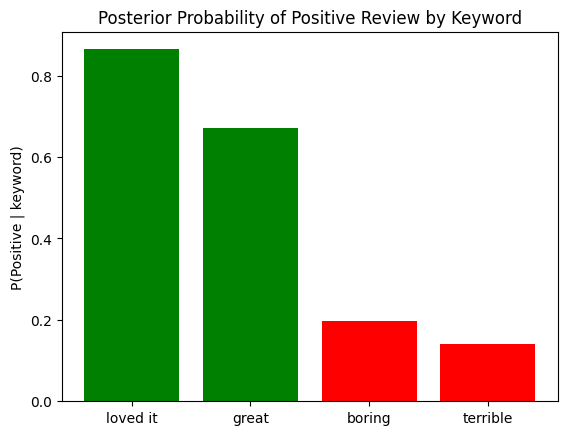

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df_results['Keyword'], df_results['Posterior'], color=['green','green','red','red'])
plt.ylabel('P(Positive | keyword)')
plt.title('Posterior Probability of Positive Review by Keyword')
plt.show()